In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 7]

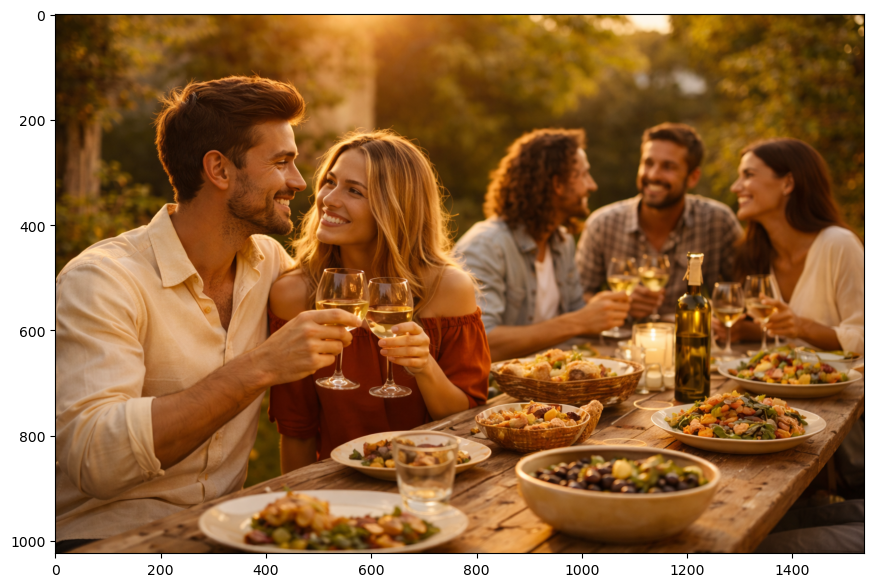

In [13]:
img = cv2.imread('images/white.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x2458f583890>)

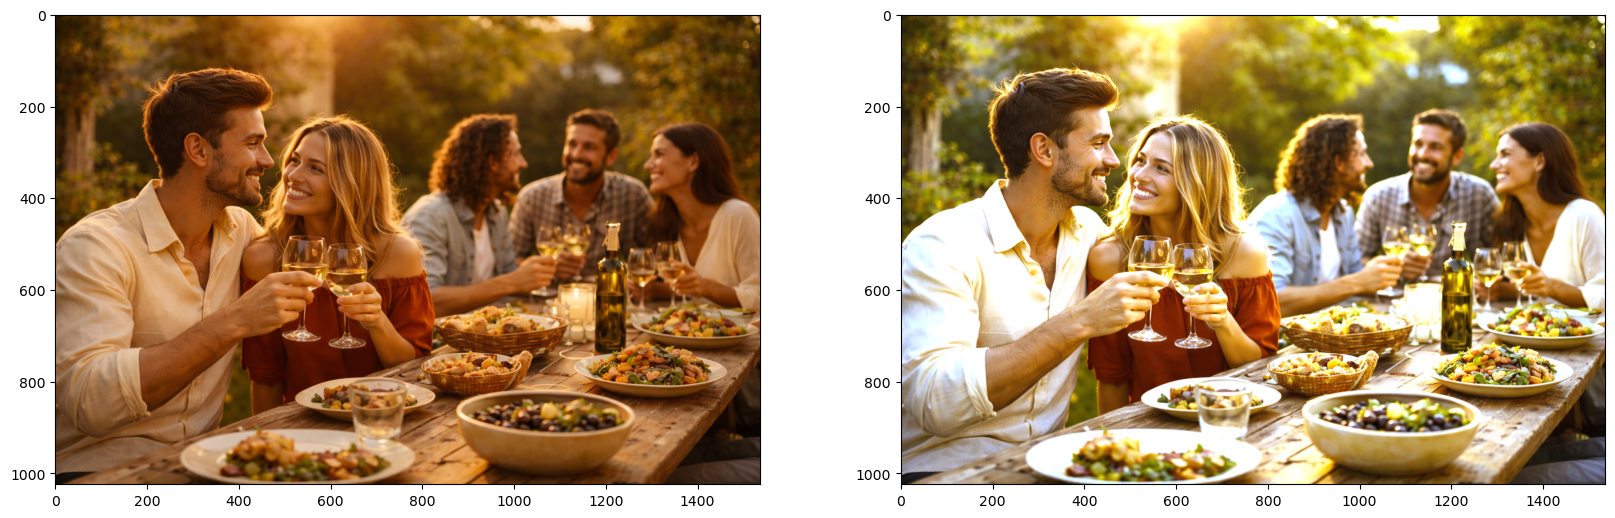

In [14]:
row, col = 620, 1500 
white = img[row, col, :]
coeffs = 255.0/white

balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]


balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

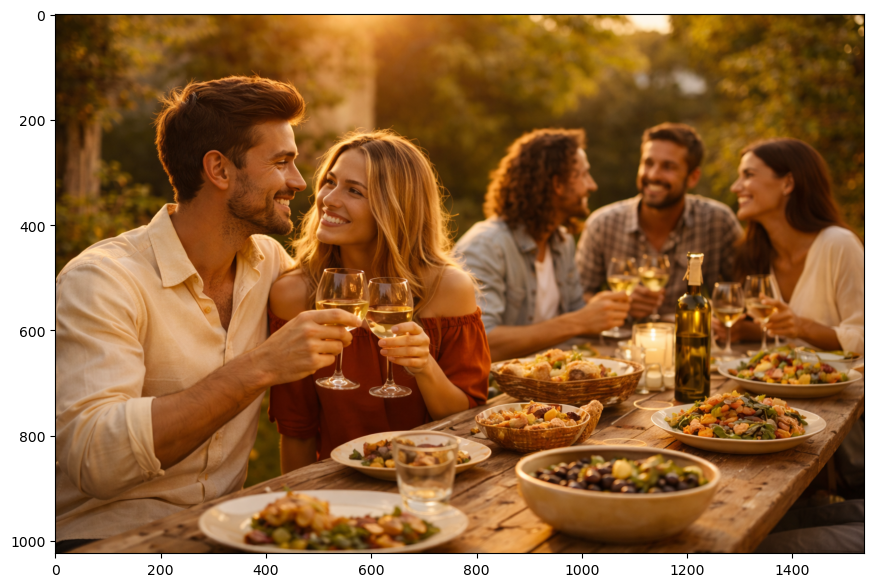

In [16]:
img = cv2.imread('images/white.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

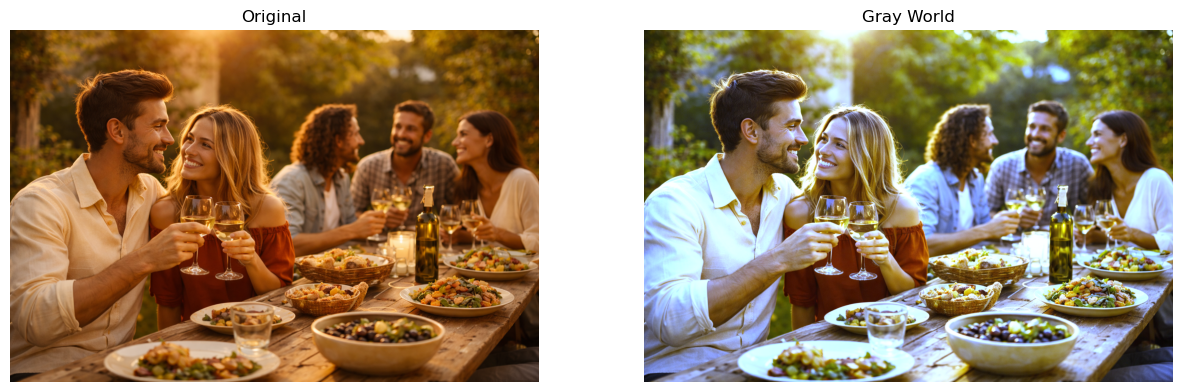

In [19]:
mean_r = img[:, :, 0].mean()
mean_g = img[:, :, 1].mean()
mean_b = img[:, :, 2].mean()
if mean_r >= mean_g and mean_r >= mean_b:
    coeffs = np.array([1, mean_r/mean_g, mean_r/mean_b])
elif mean_g >= mean_r and mean_g >= mean_b:
    coeffs = np.array([mean_g/mean_r, 1, mean_g/mean_b])
else:
    coeffs = np.array([mean_b/mean_r, mean_b/mean_g, 1])
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
balanced = balanced / 255.0
balanced[balanced > 1] = 1
plt.figure(figsize=(15,7))
plt.subplot(121); plt.imshow(img); plt.axis("off"); plt.title("Original")
plt.subplot(122); plt.imshow(balanced); plt.axis("off"); plt.title("Gray World")
plt.show()

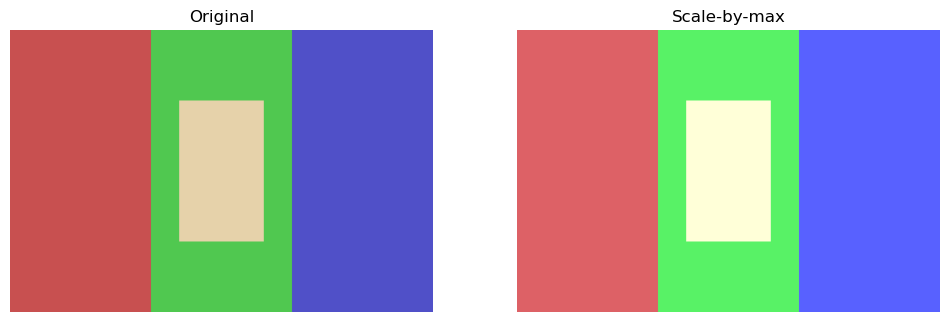

In [23]:
img = cv2.imread('images/scale_by_max.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
max_r = img[:, :, 0].max()
max_g = img[:, :, 1].max()
max_b = img[:, :, 2].max()
coeffs = np.array([255.0/max_r, 255.0/max_g, 255.0/max_b], dtype=np.float32)
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
balanced = balanced / 255.0
balanced[balanced > 1] = 1
plt.figure(figsize=(12,5))
plt.subplot(121); plt.imshow(img); plt.axis("off"); plt.title("Original")
plt.subplot(122); plt.imshow(balanced); plt.axis("off"); plt.title("Scale-by-max")
plt.show()